In [ ]:
zip_url_1= "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
zip_url_2= "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
zip_url_3= "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"

    # Download the ZIP file
response = requests.get(zip_url_1)
response.raise_for_status()  # Check if the request was successful

# Open the ZIP file from the response content
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
     # List all files in the ZIP
    print(zf.namelist())

        # Read a specific CSV file from the ZIP
    df1 = pd.read_csv(zf.open('kiva_loans_part_0.csv'))


    # Download the ZIP file
response = requests.get(zip_url_2)
response.raise_for_status()  # Check if the request was successful

    # Open the ZIP file from the response content
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # List all files in the ZIP
    print(zf.namelist())

        # Read a specific CSV file from the ZIP
    df2 = pd.read_csv(zf.open('kiva_loans_part_1.csv'))

    # Download the ZIP file
response = requests.get(zip_url_3)
response.raise_for_status()  # Check if the request was successful

    # Open the ZIP file from the response content
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # List all files in the ZIP
    print(zf.namelist())

        # Read a specific CSV file from the ZIP
    df3 = pd.read_csv(zf.open('kiva_loans_part_2.csv'))

['kiva_loans_part_0.csv', '__MACOSX/._kiva_loans_part_0.csv']
['kiva_loans_part_1.csv', '__MACOSX/._kiva_loans_part_1.csv']
['kiva_loans_part_2.csv', '__MACOSX/._kiva_loans_part_2.csv']


In [ ]:
import requests
import zipfile
import io
import altair as alt

# Standard Libraries for Data Manipulation
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations

# Data Visualization Libraries
import matplotlib.pyplot as plt  # For custom graphs at the end
import seaborn as sns  # For visualizing data patterns and trends

# System and OS Utilities
import os  # Needed for handling environment variables (e.g., in Domino)

# Supervised Machine Learning (SML) Libraries
import sklearn  # General machine learning utilities
from sklearn.ensemble import RandomForestClassifier  # Example of ensemble models
from sklearn.model_selection import train_test_split  # For creating train/test splits
from sklearn import datasets  # Loading datasets (e.g., Boston Housing Data)

# Explainable AI (XAI) Tools
# Install necessary packages for explanation tools
!pip install lime shap pdpbox -qqq
!pip install yellowbrick==1.5

import lime  # LIME: Local Interpretable Model-agnostic Explanations
import lime.lime_tabular  # Tabular data explanation with LIME
import shap  # SHAP: SHapley Additive exPlanations
import yellowbrick as yb  # Visualization tools for machine learning models
from pdpbox import pdp  # Partial dependence plots for model interpretation

In [ ]:
data = pd.concat([df1, df2, df3])

In [ ]:
data = data[data['funded_amount'] <= 99999]

In [ ]:
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


#Assignment
### 1. Problem Definition and Hypothesis:
Identify a problem or hypothesis that can be addressed using supervised learning. Frame this problem to focus on predicting a specific target variable (classification or regression).
- Our hypotheses: "Is it possible to predict the loan amount based on sector"


### 2.Data Preparation and Feature Engineering:
Clean and preprocess the dataset.
Select appropriate features for the model and justify your selection.
Optionally, experiment with feature engineering (e.g., creating new features or transforming existing ones).

In [ ]:
data = data[['funded_amount','sector','country', 'term_in_months', 'lender_count', 'borrower_genders']]
valid_genders = ['male', 'female']
data = data[data['borrower_genders'].isin(valid_genders)]
data.dropna(inplace = True)
data.head()

,funded_amount,sector,country,term_in_months,lender_count,borrower_genders
0,300.0,Food,Pakistan,12.0,12,female
2,150.0,Transportation,India,43.0,6,female
3,200.0,Arts,Pakistan,11.0,8,female
4,400.0,Food,Pakistan,14.0,16,female
5,250.0,Services,Kenya,4.0,6,female


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder


X = data.drop('funded_amount', axis=1)
y = data['funded_amount']

# One-hot encode categorical variables
ohe = OneHotEncoder() # be careful - output is a sparse matrix
cat_features = ['sector', 'country', 'borrower_genders' ]
X_cat = pd.DataFrame(ohe.fit_transform(X[cat_features]).todense(), columns=ohe.get_feature_names_out(cat_features))

# Scale numerical features
scaler = MinMaxScaler()
num_features = ['term_in_months', 'lender_count']
X_num = pd.DataFrame(scaler.fit_transform(X[num_features]), columns=num_features)

# Combine encoded categorical and scaled numerical features
X_processed = pd.concat([X_num, X_cat], axis=1) #we are combining our processed categorical and numerical data by the rows

print("Shape of processed features:", X_processed.shape)

Shape of processed features: (561211, 102)


In [ ]:
X_processed.head()

,term_in_months,lender_count,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,...,country_Uganda,country_Ukraine,country_United States,country_Vietnam,country_Virgin Islands,country_Yemen,country_Zambia,country_Zimbabwe,borrower_genders_female,borrower_genders_male
0,0.070064,0.006799,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.267516,0.003399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.063694,0.004533,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.082803,0.009065,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.019108,0.003399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



### 3.Model Selection and Training:
Apply at least two different supervised learning algorithms (e.g., Logistic Regression, Random Forest, XGBoost, etc.) and compare their performances.
Train the models using cross-validation and split your dataset into training and testing sets.

In [ ]:
X_processed.shape

(561211, 102)

In [ ]:
Small_X_processed = X_processed.head(5000)

In [ ]:
Small_y = y.head(5000)

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Small_X_processed, Small_y, test_size = 0.2)

model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor(n_estimators=25)
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)


print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model EL' + ' ' + str(model_el.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))

Model OLS -1.9633038302041704e+21
Model EL 0.07906365443878494
Model RF 0.8602194559617904



### 4. Hyperparameter Tuning:
Perform hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) on the selected models to optimize their performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

#####OLS


#####EL

In [ ]:
parameters_el = {'alpha':[0.1, 0.5, 1.0],
                 'l1_ratio':[0.1, 0.5, 0.75]}

In [ ]:
# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_el, parameters_el, scoring=scorer)

In [ ]:
grid_obj

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1.0],
                         'l1_ratio': [0.1, 0.5, 0.75]},
             scoring=make_scorer(mean_squared_error, response_method='predict'))

In [ ]:
grid_fit = grid_obj.fit(Small_X_processed, Small_y)

In [ ]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

ElasticNet(l1_ratio=0.1)

In [ ]:
best_reg.score(X_test, y_test)

0.05303842365736011

#####Random Forest

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [25, 30]}

In [ ]:
grid_obj = GridSearchCV(model_rf, parameters_rf, scoring=scorer)

In [ ]:
grid_fit = grid_obj.fit(Small_X_processed, Small_y)

In [ ]:
# Get the estimator.
best_reg = grid_fit.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, n_estimators=25)

In [ ]:
# Model performance on TRAIN data
best_reg.score(X_train, y_train)

0.997231757983888

In [ ]:
# Model performance on TEST data
best_reg.score(X_test, y_test)

0.8101688641729171

### 5. Model Evaluation:
Evaluate model performance using appropriate metrics (e.g., accuracy, precision, recall, mean squared error, etc.).
Include visualizations to support your evaluation, such as confusion matrix or feature importance plots.

In [ ]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, best_reg.predict(X_train))) #valget af regressionen er måske forkert, men kan ikke køre koden
test_rmse = np.sqrt(mean_squared_error(y_test, best_reg.predict(X_test)))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 36.24
Test RMSE: 253.15


### 6. Explainability:
Use SHAP values or another interpretability tool to explain the key factors driving your model's predictions.
Reflect on model transparency and the interpretability of your results in context to the dataset.

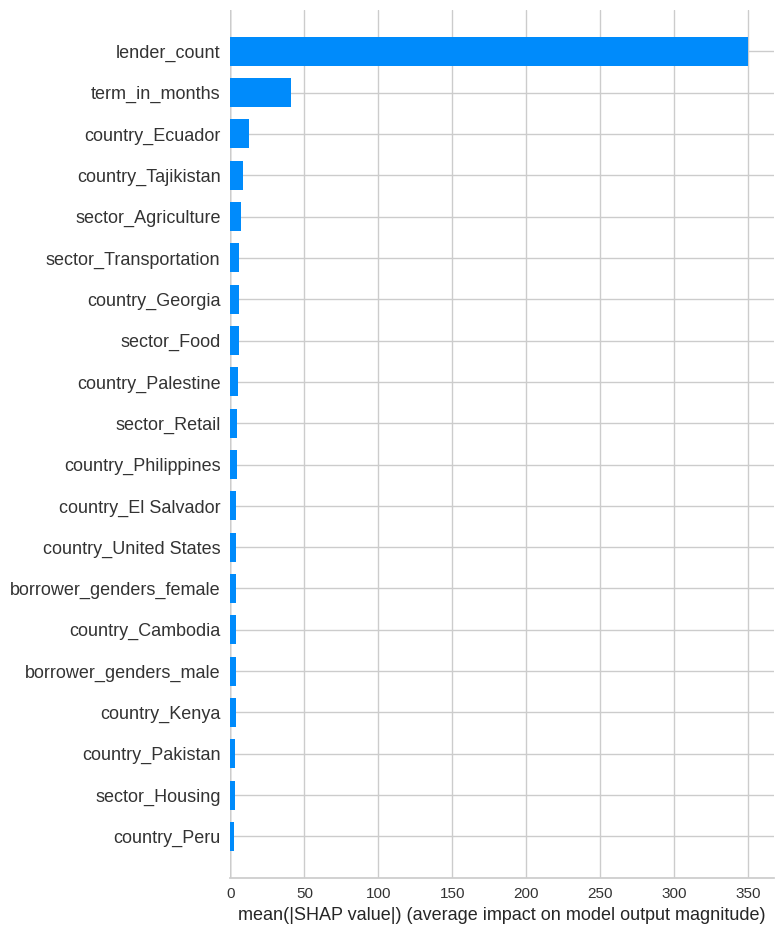

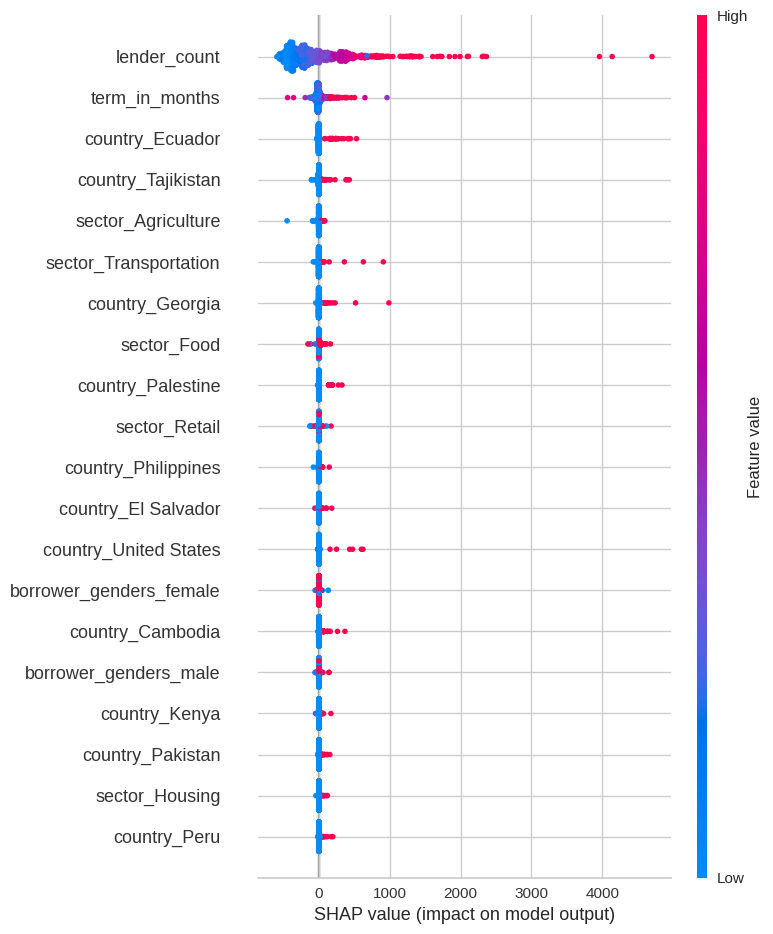

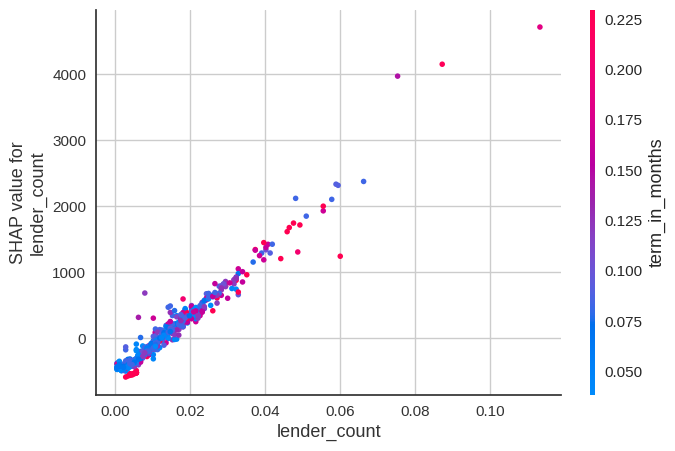

In [ ]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(best_reg)#tjek at det er den rette model
shap_values = explainer.shap_values(X_test)

# Plot feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot SHAP values
shap.summary_plot(shap_values, X_test)

# Plot dependence for the most important feature
most_important_feature = X_test.columns[np.argmax(np.abs(shap_values).mean(0))]
shap.dependence_plot(most_important_feature, shap_values, X_test)

*The first plot is the features importance: the features that are most important in driving the loan up or down.*

*The second plot: show how different feature values (low or high) affect the output.*

*Plot three is dependence plot*

In [ ]:
import joblib

#Storing our data - so we can use it in streamlit
joblib.dump(best_reg, 'best_reg.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(ohe, 'ohe.joblib')

['ohe.joblib']

### 7. Feature Selection Reflection:
Reflect on your feature selection process and any changes in model performance with different features. Discuss any dimensionality reduction techniques you may have considered (e.g., PCA, feature importance rankings).

We initially considered combining the variables "use" and "activity" into a single composite variable through Principal Component Analysis (PCA). However, upon further evaluation, we determined that PCA was not necessary due to the limited number of relevant variables available.

We proceeded to run three models—Ordinary Least Squares (OLS), Elastic Net (EL), and Random Forest (RF)—and obtained the following results:

Model OLS: 0.8755
Model EL: 0.0599
Model RF: 0.8881
The Random Forest model demonstrated the best performance. After applying hyperparameter tuning, we observed a marginal improvement in the performance to 0.894. While this represents a slight increase, one could question the value of pursuing hyperparameter optimization further given the significant computational resources required for tuning.

Due to computational constraints, we had to reduce our dataset from an initial size of over 500,000 rows to just 5,000 rows in order to run the models efficiently, particularly when using platforms like Streamlit instead of Google Colab. While we managed to run models on 100,000 rows, this required several hours, during which we observed a more pronounced improvement in model performance, especially with hyperparameter tuning. Interestingly, with the larger dataset, the performance disparity between OLS and Random Forest became more evident, with OLS showing a relative decline. Unfortunately, the need to reduce the dataset size to accommodate platform limitations restricted our ability to fully exploit the models' capabilities.

### 8. App Development:
https://huggingface.co/spaces/Chri12345/assignment4#a442a674